In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

L_data = pd.read_csv("Data/L_data_merged.csv", low_memory = False)

In [2]:
L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

In [3]:
L_data.head()

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
0,2004-10-09,A,1057,Harold Washington Library-State/Van Buren (Bro...,True,False,False,False,True,False,False,False,False,False,"(41.876862, -87.628196)",Chicago Loop,Chicago
1,2010-06-18,W,1154,Central Park (Pink Line),True,False,False,False,False,False,False,False,True,False,"(41.853839, -87.714842)",North Lawndale,Chicago
2,2001-10-30,W,2116,Montrose (Brown Line),True,False,False,False,True,False,False,False,False,False,"(41.961756, -87.675047)",Lincoln Square,Chicago
3,2006-10-26,W,0,Washington/State (Closed),NaN,True,False,False,False,False,False,False,False,False,"(41.8837, -87.6278)",Chicago Loop,Chicago
4,2010-07-07,W,9431,Monroe (Red Line),False,True,False,False,False,False,False,False,False,False,"(41.880745, -87.627696)",Chicago Loop,Chicago


Season data, ridership over the year from jan 5 2015 to jan 31 2016

Text(0.5, 1.0, 'Number of Rides vs Date (2015-2016)')

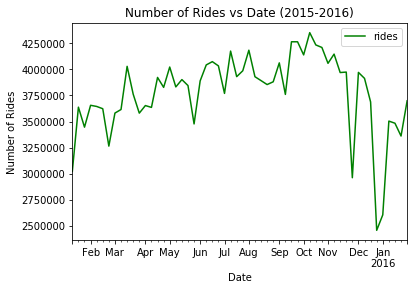

In [4]:
L_data.loc[(L_data['date']>= "01-05-2015") & (L_data['date']<= "01-31-2016")].groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
}).plot(kind = 'line', color='green')

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Date (2015-2016)')

Text(0.5, 1.0, 'Number of Rides vs Date (2016-2017)')

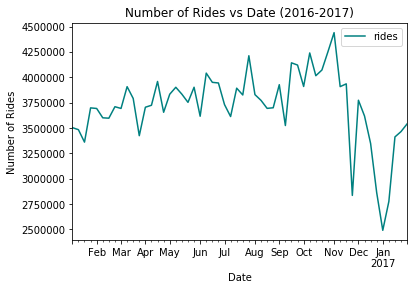

In [5]:
L_data.loc[(L_data['date']>= "01-04-2016") & (L_data['date']<= "01-29-2017")].groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
}).plot(kind = 'line', color='teal')

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Date (2016-2017)')

Text(0.5, 1.0, 'Number of Rides vs Date (2017-2018)')

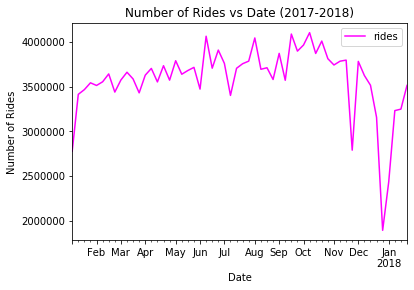

In [6]:
L_data.loc[(L_data['date']>= "01-02-2017") & (L_data['date']<= "01-28-2018")].groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
}).plot(kind = 'line', color='magenta')

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Date (2017-2018)')

Text(0.5, 1.0, 'Number of Rides vs Date (2018-2019)')

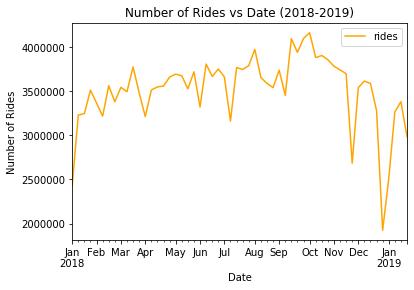

In [7]:
L_data.loc[(L_data['date']>= "01-01-2018") & (L_data['date']<= "01-27-2019")].groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
}).plot(kind = 'line', color='orange')

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Date (2018-2019)')

Text(0.5, 1.0, 'Number of Rides vs Date (2019-2020)')

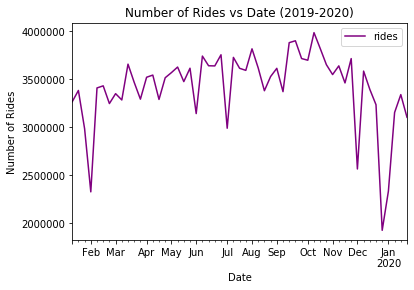

In [8]:
L_data.loc[(L_data['date']>= "01-07-2019") & (L_data['date']<= "01-26-2020")].groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
}).plot(kind = 'line', color='purple')

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Date (2019-2020)')

Text(0.5, 1.0, 'Number of Rides vs Date (2020)')

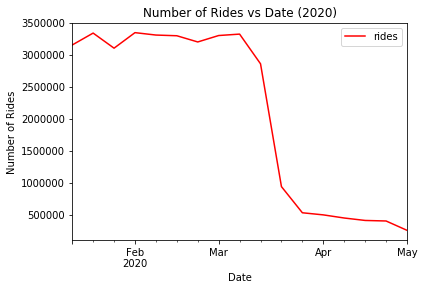

In [9]:
L_data.loc[(L_data['date']>= "01-06-2020") & (L_data['date']<= "01-31-2021")].groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
}).plot(kind = 'line', color='red')

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Date (2020)')

In [10]:
#find the unique daytypes

L_data['daytype'].unique()

array(['A', 'W', 'U'], dtype=object)

In [11]:
L_data_2018 = L_data.loc[(L_data['date']>= '01-01-2018') & (L_data['date']<= "12-31-2018")]

L_data_2018.head()

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
884071,2018-01-19,W,930,Oakton-Skokie (Yellow Line),True,False,False,False,False,False,False,True,False,False,"(42.02624348, -87.74722084)",NaN,Skokie
884072,2018-02-20,W,5289,Pulaski (Orange Line),True,False,False,False,False,False,False,False,False,True,"(41.799756, -87.724493)",Archer Heights,Chicago
884073,2018-02-07,W,771,Central (Purple Line),False,False,False,False,False,True,True,False,False,False,"(42.063987, -87.685617)",NaN,Evanston
884074,2018-03-31,A,629,47th (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.809209, -87.618826)",Bronzeville,Chicago
884075,2018-03-31,A,3288,"Howard (Red, Purple & Yellow Lines)",True,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)",Rogers Park,Chicago


In [12]:
#get rides for 2018 and by type
rides_2018 = L_data_2018[['daytype', 'rides']]

rides_2018.head()

,daytype,rides
884071,W,930
884072,W,5289
884073,W,771
884074,A,629
884075,A,3288


In [31]:
#sum the rides by daytypes for 2018
rides_2018_daytype = rides_2018.groupby('daytype').sum()

rides_2018_daytype.reset_index()

rides_2018_daytype_avg = rides_2018.groupby("daytype").mean()
rides_2018_daytype_avg.reset_index()

,daytype,rides
0,A,2369.478632
1,U,1761.749671
2,W,4158.158224


In [32]:
rides_A_18 = rides_2018_daytype['A']
rides_U_18 = rides_2018_daytype['U']
rides_W_18 = rides_2018_daytype['W']
avg_rides_A_18 = rides_2018_daytype_avg['A']
avg_rides_U_18 = rides_2018_daytype_avg['U']
avg_rides_W_18 = rides_2018_daytype_avg['W']

#create 2018 ride values data frame
ride_values_2018 = pd.DataFrame(columns = ["Total Rides", "Average Rides"], 
                             index = ["A", "U", "W"])

ride_values_2018.loc["A"] = [rides_A_18, avg_rides_A_18]
ride_values_2018.loc["U"] = [rides_U_18, avg_rides_U_18]
ride_values_2018.loc["W"] = [rides_W_18, avg_rides_W_18]

KeyError: 'A'

In [ ]:
#find the mean for each daytype

# rides_2018_daytype_mean = rides_2018.groupby(['daytype']).mean()["rides"].rename("Avg Rides")
# rides_2018_daytype_mean 


In [ ]:
#seasonality time series pandas 

In [ ]:
# L_data_2018 = L_data.loc[(L_data['date']>= '01-01-2018') & (L_data['date']<= "12-31-2018")]

# L_data_2018.head()

In [ ]:
# L_data_2020 = L_data.loc[L_data['date']>= '01-01-2020']

# L_data_2020.head()

In [ ]:
# #weekly rides

# # Create bins for weeks of the year
# week_bins = ["01-01-2018 to 01-07-2018", "01-08-2018 to 01-14-2018", "01-15-2018 to 01-21-2018", "01-22-2018 to 01-28-2018", "01-29-2018 to 02-04-2018", 
#             "02-05-2018 to 02-11-2018", "02-12-2018 to 02-18-2018", "02-19-2018 to 02-25-2018", "02-26-2018 to 03-04-2018", "03-05-2018 to 03-11-2018", 
#             "03-12-2018 to 03-18-2018", "03-19-2018 to 03-25-2018", "03-26-2018 to 04-01-2018", "04-02-2018 to 04-08-2018", "04-09-2018 to 04-15-2018", 
#             "04-16-2018 to 04-22-2018", "04-23-2018 to 04-29-2018", "04-30-2018 to 05-06-2018", "05-07-2018 to 05-13-2018", "05-14-2018 to 05-20-2018", 
#              "05-21-2018 to 05-27-2018", "05-28-2018 to 06-03-2018", "06-04-2018 to 06-10-2018", "06-11-2018 to 06-17-2018", "06-18-2018 to 06-24-2018", 
#              "06-25-2018 to 07-01-2018", "07-02-2018 to 07-08-2018", "07-09-2018 to 07-15-2018", "07-16-2018 to 07-22-2018", "07-23-2018 to 07-29-2018", 
#             "07-30-2018 to 08-05-2018", "08-06-2018 to 08-12-2018", "08-13-2018 to 08-19-2018", "08-20-2018 to 08-26-2018", "08-27-2018 to 09-02-2018", 
#             "09-03-2018 to 09-09-2018", "09-10-2018 to 09-16-2018", "09-17-2018 to 09-23-2018", "09-24-2018 to 09-30-2018", "10-01-2018 to 10-07-2018", 
#             "10-08-2018 to 10-14-2018", "10-15-2018 to 10-21-2018", "10-22-2018 to 10-28-2018", "10-29-2018 to 11-04-2018", "11-05-2018 to 11-11-2018", 
#              "11-12-2018 to 11-18-2018", "11-19-2018 to 11-25-2018", "11-26-2018 to 12-02-2018", "12-03-2018 to 12-09-2018", "12-10-2018 to 12-16-2018", 
#             "12-17-2018 to 12-23-2018", "12-24-2018 to 12-31-2018"]

# # Create labels for these bins
# group_labels_week = ["week 1", "week 2", "week 3", "week 4", "week 5", "week 6", "week 7", "week 8", "week 9", "week 10", "week 11", "week 12", "week 13", 
#                      "week 14", "week 15", "week 16", "week 17", "week 18", "week 19", "week 20", "week 21", "week 22", "week 23", "week 24", "week 25", 
#                      "week 26", "week 27", "week 28", "week 29", "week 30", "week 31", "week 32", "week 33", "week 34", "week 35", "week 36", "week 37", 
#                      "week 38", "week 39", "week 40", "week 41", "week 42", "week 43", "week 44", "week 45", "week 46", "week 47", "week 48", "week 49", 
#                      "week 50", "week 51", "week 52"]
    
    
# # Slice the data and place it into bins and do calculations
# L_data_2018['Week of the Year'] =  pd.cut(L_data_2018["date"], week_bins, labels=group_labels_week)

# L_data_2018['Week of the Year']
